# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 4

Do wykonania laboratorium należy skorzystać z bibliotek:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)

### Zadanie 1

Dana jest następująca lista prostokątów:

```
rectangles = [("R1", 5, 4.5), ("Szeroki", 11, 3), ("R2", 4, 6), ("Wąski", 3, 8), ("Kwadrat 1", 5, 5), ("Kwadrat 2", 4.5, 4.5)] 
```

gdzie kolejne pola krotek to: 
- nazwa, 
- szerokość, 
- wysokość.

#### A) 
Na jej bazie utwórz ustrukturalizowaną tablicę Numpy (`np.array(...)`), następnie posortuj dane prostokąty rosnąco po polu, a w przypadku równości niech decyduje (alfabetycznie) nazwa prostokąta.

#### B) 
Wypisz posortowaną tablicę, w kolejności pól: 
1. szerokość, 
2. wysokość, 
3. nazwa.

> Uwaga: Gdzie to możliwe, działaj na typach i funkcjach z biblioteki Numpy.



In [207]:
rectangles = [("R1", 5, 4.5), ("Szeroki", 11, 3), ("R2", 4, 6), ("Wąski", 3, 8), ("Kwadrat 1", 5, 5), ("Kwadrat 2", 4.5, 4.5)]

# A
from typing import Tuple
from numpy import array


def sort_func(elements: Tuple) -> Tuple:
    return elements[1].astype(float) * elements[2].astype(float), elements[0]


np_rectangles = array(rectangles)
np_rectangles = array(sorted(np_rectangles, key=sort_func))
np_rectangles

array([['Kwadrat 2', '4.5', '4.5'],
       ['R1', '5', '4.5'],
       ['R2', '4', '6'],
       ['Wąski', '3', '8'],
       ['Kwadrat 1', '5', '5'],
       ['Szeroki', '11', '3']], dtype='<U32')

In [208]:
# B1 - szerokość
np_rectangles = array(rectangles)
np_rectangles[np_rectangles[:, 1].argsort()]

array([['Szeroki', '11', '3'],
       ['Wąski', '3', '8'],
       ['R2', '4', '6'],
       ['Kwadrat 2', '4.5', '4.5'],
       ['R1', '5', '4.5'],
       ['Kwadrat 1', '5', '5']], dtype='<U32')

In [209]:
# B2 - wysokość
np_rectangles = array(rectangles)
np_rectangles[np_rectangles[:, 2].argsort()]

array([['Szeroki', '11', '3'],
       ['R1', '5', '4.5'],
       ['Kwadrat 2', '4.5', '4.5'],
       ['Kwadrat 1', '5', '5'],
       ['R2', '4', '6'],
       ['Wąski', '3', '8']], dtype='<U32')

In [210]:
# B3 - nazwa
np_rectangles = array(rectangles)
np_rectangles[np_rectangles[:, 0].argsort()]

array([['Kwadrat 1', '5', '5'],
       ['Kwadrat 2', '4.5', '4.5'],
       ['R1', '5', '4.5'],
       ['R2', '4', '6'],
       ['Szeroki', '11', '3'],
       ['Wąski', '3', '8']], dtype='<U32')

### Zadanie 2 - gra 2048

Dana jest kwadratowa plansza o boku `SIZE` (np. 4) dla znanej gry 2048 (https://2048game.com/pl/). 
Każdy wiersz zawiera od 0 do 4 liczb. Należy, z wykorzystaniem konstrukcji Numpy, zasymulować ruch w lewo, w prawo, w górę i w dół planszy zgodnie z regułami gry (ale **BEZ** dodawania nowego kafelka w losowym miejscu). Innymi słowy, trzeba napisać cztery funkcje: 
- `move_left(...)`, 
- `move_right(...)`, 
- `move_up(...)`, 
- `move_down(...)`.

Przykład ruchu w prawo:

Wejściem i wyjściem każdej z obu funkcji jest 2-wymiarowa tablica Numpy.

> UWAGA: postaraj się napisać funkcję tylko do jednego ruchu, a pozostałe trzy niech się do niej w sprytny sposób odwołują.

#### Przykład ruchu w prawo:
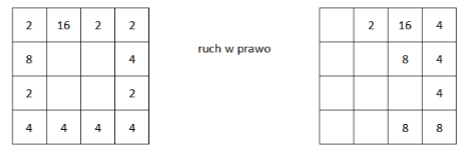

In [211]:
board = array([[2, 0, 2, 0], [2, 2, 0, 0], [4, 4, 2, 2], [4, 4, 2, 2]])
board

array([[2, 0, 2, 0],
       [2, 2, 0, 0],
       [4, 4, 2, 2],
       [4, 4, 2, 2]])

In [212]:
from numpy import ndarray, fliplr, flipud, rot90


def move_left(arr: ndarray) -> ndarray:
    for row in range(arr.shape[0]):
        for column in range(arr.shape[1] - 1):
            arr[row] = array(sorted(arr[row], key=lambda x: not x))

            if arr[row][column] == arr[row][column + 1]:
                arr[row][column] *= 2
                arr[row][column + 1] = 0

    return arr


def move_right(arr: ndarray) -> ndarray:
    return fliplr(move_left(fliplr(arr)))


def move_down(arr: ndarray) -> ndarray:
    return rot90(move_left(rot90(arr, 3)))


def move_up(arr: ndarray) -> ndarray:
    return flipud(move_down(flipud(arr)))

In [213]:
# move left
board = array([[2, 0, 2, 0], [2, 2, 0, 0], [4, 4, 2, 2], [4, 4, 2, 2]])
move_left(board)

array([[4, 0, 0, 0],
       [4, 0, 0, 0],
       [8, 4, 0, 0],
       [8, 4, 0, 0]])

In [214]:
# move right
board = array([[2, 0, 2, 0], [2, 2, 0, 0], [4, 4, 2, 2], [4, 4, 2, 2]])
move_right(board)

array([[0, 0, 0, 4],
       [0, 0, 0, 4],
       [0, 0, 8, 4],
       [0, 0, 8, 4]])

In [215]:
# move up
board = array([[2, 0, 2, 0], [2, 2, 0, 0], [4, 4, 2, 2], [4, 4, 2, 2]])
move_up(board)

array([[4, 2, 4, 4],
       [8, 8, 2, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [216]:
# move down
board = array([[2, 0, 2, 0], [2, 2, 0, 0], [4, 4, 2, 2], [4, 4, 2, 2]])
move_down(board)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [4, 2, 2, 0],
       [8, 8, 4, 4]])